In [40]:
import pandas as pd
from ord_data_load import draw_reaction
from ord_data_load import ORD_PATH, ORD_REPO_PATH

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')

In [3]:
# all Palladium containing reactions as catalyst
pd_cat = all_reactions.reaction_smile.str.contains('Pd').fillna(False)
pd_cat.sum()

132729

In [4]:
# containing palladium/Pd keyword in notes
pd_notes = all_reactions.notes.str.contains(r'Pd|[Pp]all?ad').fillna(False)
pd_notes.sum()

155574

In [5]:
# what are preceding chars (for future tokenization)
pre = all_reactions.notes.str.extract(r'(.)(?=[Pp]allad)')[0]
pre

0            i
1            i
2            i
3            i
4             
          ... 
1790143    NaN
1790144    NaN
1790145    NaN
1790146    NaN
1790147    NaN
Name: 0, Length: 1790148, dtype: object

In [6]:
pre_unique = pre.dropna().value_counts()
pre_unique

     53517
)    23229
i     6236
o     3588
-     2985
]     1449
e      888
y      318
(       73
l       72
n       37
s       36
/       18
}        9
—        4
,        3
r        3
[        3
0        1
.        1
"        1
%        1
_        1
Name: 0, dtype: int64

#### 'o' ####


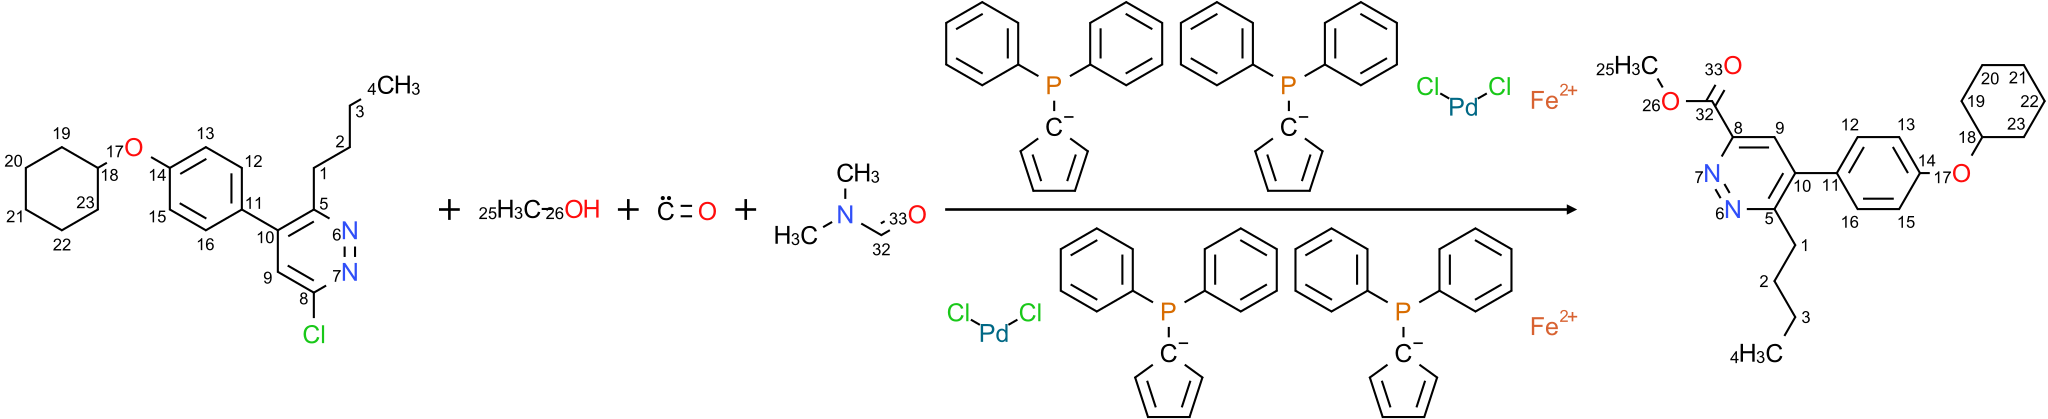

To a stirred solution of 3-butyl-6-chloro-4-(4-cyclohexyloxy-phenyl)-pyridazine (Example 14, 29 mmol, 10.0 g) in mixture of methanol and DMF (1:1, 100 mL) was added [1,1′-bis(diphenylphosphino)ferrocene]dichloropalladium(II) PdCl2 (10 mol %, 2.2 g), DPPF (10 mol %, 1.6 g) and TEA (72.5 mmol, 10 mL). The reaction was stirred at 90° C. under 40-50 psi pressure of carbon monoxide for 8 h. The solvent was removed, and the crude product was purified using hexane:ethyl acetate on a 330 g ISCO silica gel column to provide 6-butyl-5-(4-cyclohexyloxy-phenyl)-pyridazine-3-carboxylic acid methyl ester (10.0 g).
CPU times: total: 93.8 ms
Wall time: 91 ms


In [98]:
%%time
pre_char = pre_unique.index.values[3]
print(f"#### '{pre_char}' ####")
draw_reaction(all_reactions[pre == pre_char].sample(), notes_text='allad')

In [99]:
# Single letter regex mistake
s = 'alladium'
regex_pattern = ''
for i in range(len(s)):
    print(s[:i] + f'[^{s[i]}]' + s[i+1:])
    regex_pattern += s[:i] + f'[^{s[i]}]' + s[i+1:] + '|'
regex_pattern = regex_pattern[:-1]
regex_pattern

[^a]lladium
a[^l]ladium
al[^l]adium
all[^a]dium
alla[^d]ium
allad[^i]um
alladi[^u]m
alladiu[^m]


'[^a]lladium|a[^l]ladium|al[^l]adium|all[^a]dium|alla[^d]ium|allad[^i]um|alladi[^u]m|alladiu[^m]'

In [100]:
pd_mistakes = all_reactions.notes.str.contains(f'{regex_pattern}').fillna(False)
pd_mistakes.sum()

75

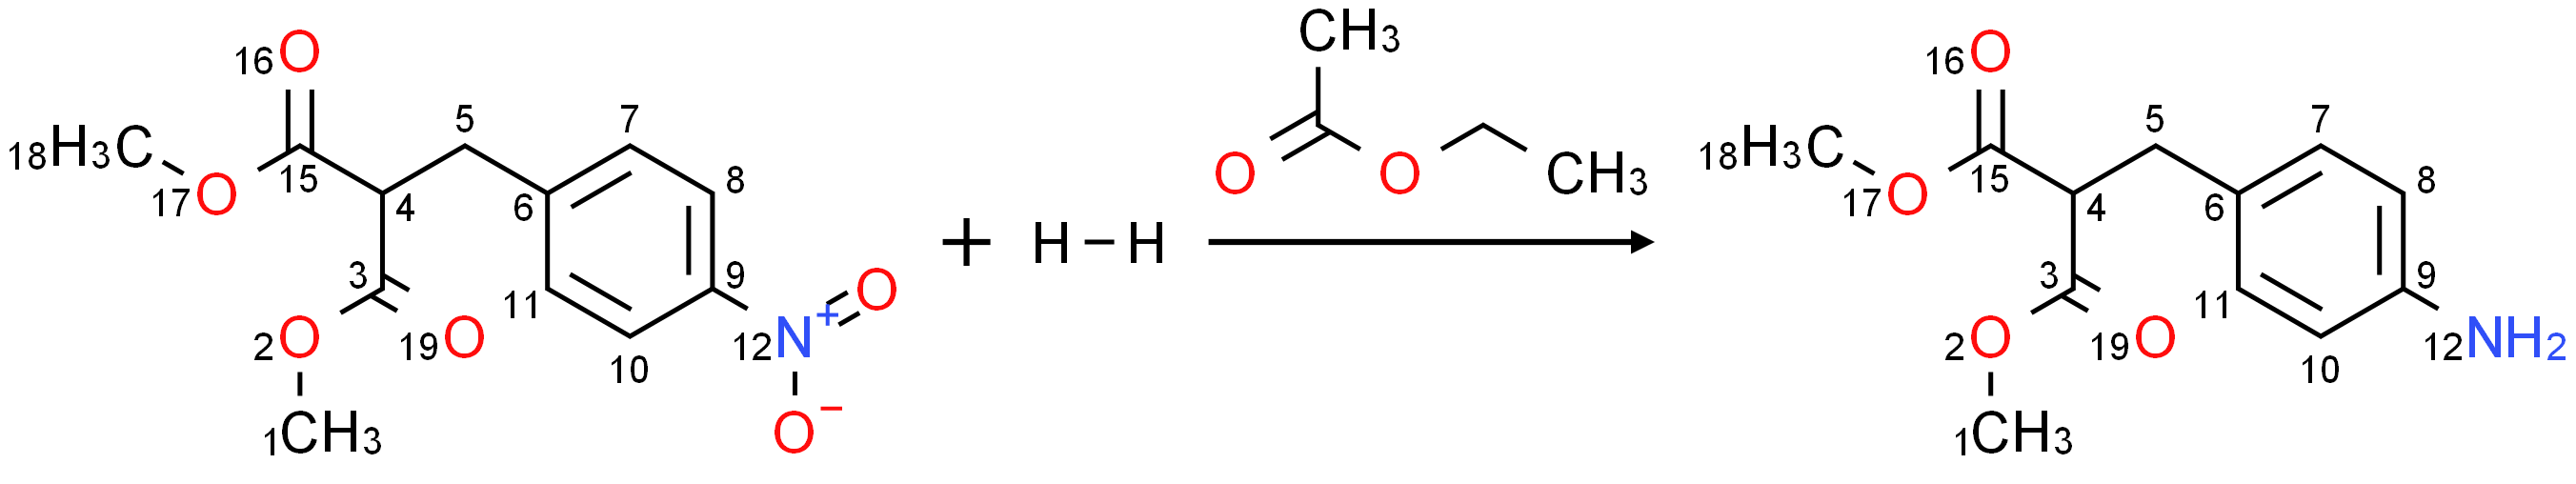

The compound 2-carbomethoxy-3-(4-nitrophenyl)propanoic acid methyl ester (p-nitrobenzyl malonate dimethyl ester) (2.00 g, 7.55 mmole) was dissolved in 70 ml of ethyl acetate containing 5 percent palladiunm on carbon (1.0 g-Aldrich Chemical Company) catalyst and was hydrogenated in a Parr shaker employing 50 psig of hydrogen at 22° C. Hydrogen uptake was rapid (15 minutes) and the mixture was maintained under hydrogen pressure for another three hours. The pressure vessel was vented and flushed with nitrogen (N2). The suspension was filtered through a pad of celite and the solvent was removed in vacuo using a rotary evaporator to provide 3-(4-aminophenyl)-2-carbomethoxypropanoic acid methyl ester (p-aminobenzylmalonate dimethyl ester) (1.76 g, 7.41 mmole) as a light yellow oil in 98 percent yield. The structure was confirmed by 1H nuclear magnetic resonance (PNMR) and 13C nuclear magnetic resonance (CMR) as well as mass spectroscopy (MS) spectral analysis.


In [138]:
draw_reaction(all_reactions[pd_mistakes & ~pd_cat].sample(), notes_text='dium')

In [102]:
pd_mask = pd_cat | pd_notes | pd_mistakes
pd_df = all_reactions[pd_mask]
len(pd_df)

156269

In [103]:
%%time
pd.to_pickle(pd_df, f'{ORD_PATH}/pd_df.pkl')

CPU times: total: 1.78 s
Wall time: 1.82 s


In [104]:
pd.to_pickle(pd_mask, f'{ORD_PATH}/pd_mask.pkl')

In [105]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

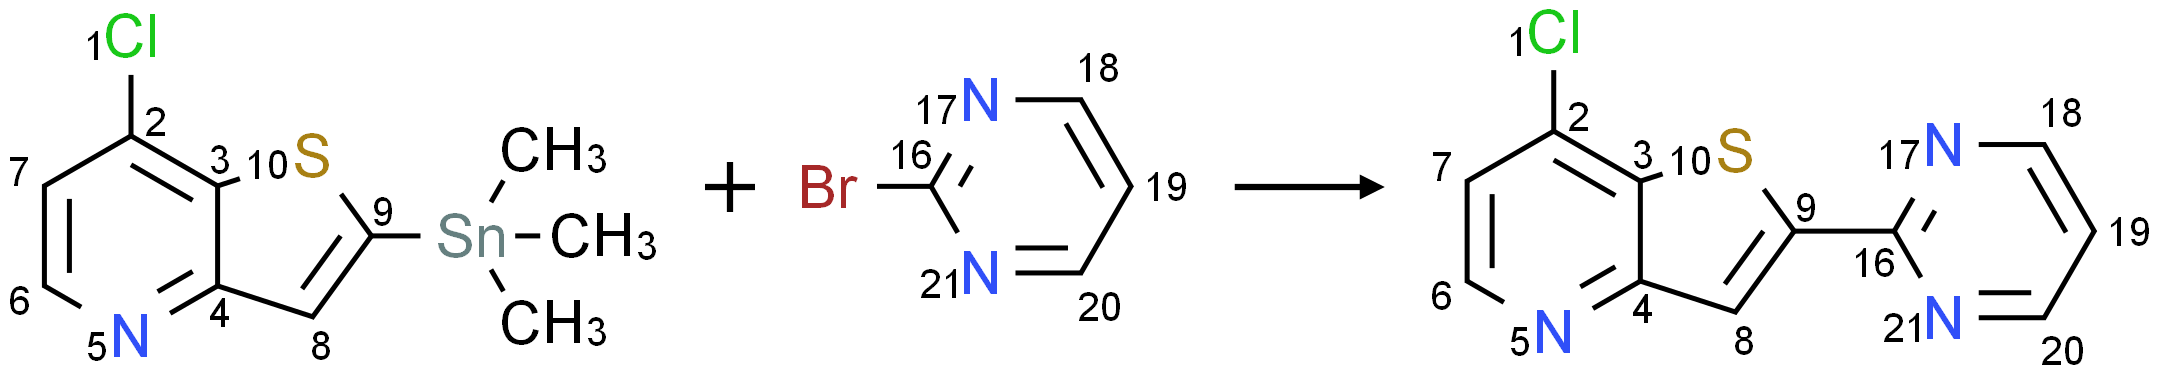

This material was prepared by coupling 7-chloro-2-(trimethylstannyl)thieno[3,2-b]pyridine 39a (0.218 g, 0.66 mmole) with 2-bromopyrimidine (0.104 g, 0.66 mmole) using tereakis(triphenylphosphine) palladium(0) (31 mg) as catalyst in a manner as previously described for example 39b to give a white solid (0.066 g, 40%). 1H NMR (300 MHz, CDCl3) δ8.76 (2H, d, J=4.90 Hz), 8.57 (1H, d, J=5.1 Hz), 8.41 (1H, s), 7.26 (1H, d, J=5.1 Hz), 7.20 (1H, m); ESIMS (MH+): 248.00.


In [144]:
draw_reaction(pd_df.sample(), notes_text='alladium')